In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

device = torch.device('mps')
print(f'Device: {device}')

Device: mps


# Mini užduotis 1

Užduotis: suskaičiuoti klasių "cat" ir "dog" tikslumą su duotu modeliu ir duomenų rinkiniu. Duomenų rinkinys yra CIFAR-10.

Duomenų rinkinio klasės:  
0: plane  
1: car  
2: bird  
3: cat  
4: deer  
5: dog  
6: frog  
7: horse  
8: ship  
9: truck

In [2]:
class Net(torch.nn.Module):
  def __init__(self, num_classes = 10):
    super().__init__()
    self.num_classes = num_classes
    self.conv1 = torch.nn.Conv2d(3, 6, 5)
    self.pool = torch.nn.MaxPool2d(2, 2)
    self.conv2 = torch.nn.Conv2d(6, 16, 5)
    self.fc1 = torch.nn.Linear(16 * 5 * 5, 120)
    self.fc2 = torch.nn.Linear(120, 84)
    self.fc3 = torch.nn.Linear(84, self.num_classes)
    self.relu = torch.nn.ReLU()

  def forward(self, x):
    x = self.pool(self.relu(self.conv1(x)))
    x = self.pool(self.relu(self.conv2(x)))
    x = torch.flatten(x, 1) # flatten all dimensions except batch
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.fc3(x)
    return x

!wget -O mini1.pth http://klevas.mif.vu.lt/~mif28413/gmm/mini/mini1.pth
model = torch.load('mini1.pth').to(device)

--2024-04-17 16:43:22--  http://klevas.mif.vu.lt/~mif28413/gmm/mini/mini1.pth
Resolving klevas.mif.vu.lt (klevas.mif.vu.lt)... 193.219.42.12
Connecting to klevas.mif.vu.lt (klevas.mif.vu.lt)|193.219.42.12|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 253660 (248K)
Saving to: ‘mini1.pth’

mini1.pth           100%[===================>] 247,71K  --.-KB/s    in 0,04s   

2024-04-17 16:43:23 (5,88 MB/s) - ‘mini1.pth’ saved [253660/253660]



In [3]:
transform = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
test_set = torchvision.datasets.CIFAR10(root = './data-cifar', train = False, download = True, transform = transform)

Files already downloaded and verified


a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a


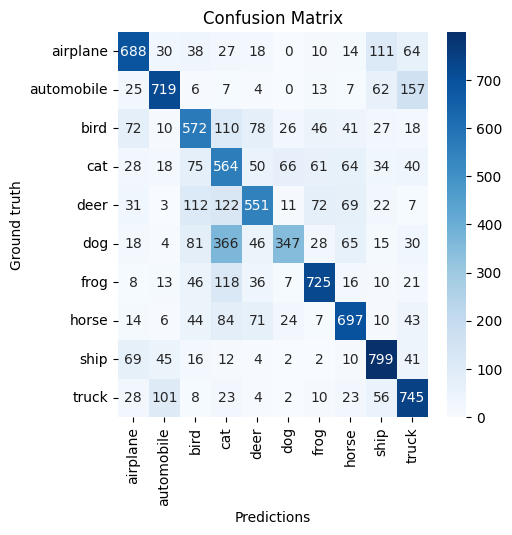

              precision    recall  f1-score   support

    airplane       0.70      0.69      0.69      1000
  automobile       0.76      0.72      0.74      1000
        bird       0.57      0.57      0.57      1000
         cat       0.39      0.56      0.46      1000
        deer       0.64      0.55      0.59      1000
         dog       0.72      0.35      0.47      1000
        frog       0.74      0.72      0.73      1000
       horse       0.69      0.70      0.69      1000
        ship       0.70      0.80      0.74      1000
       truck       0.64      0.74      0.69      1000

    accuracy                           0.64     10000
   macro avg       0.66      0.64      0.64     10000
weighted avg       0.66      0.64      0.64     10000



(None,
 ['airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'])

In [5]:
from torch.utils.data import DataLoader
from torch import cat as c
from torch import tensor as t
import matplotlib.pyplot as plt

test_dl = DataLoader(test_set, shuffle = False, batch_size = 16, num_workers = 8)

y     = []
y_hat = []

test_history = {
  'ls': torch.zeros(0),
  'ys': torch.zeros(0, 0),
  'y_hats': torch.zeros(0,0)
}; test_history

y = t([])
y_hat = t([])
model.eval()
with torch.no_grad():
  for inputs, labels in test_dl:
    inputs, labels = inputs.to(device), labels.to(device)

    outputs = model(inputs)

    y     = c((y, labels.detach().cpu().to("cpu")), dim = -1)
    y_hat = c((y_hat, outputs.argmax(dim = -1).detach().cpu().to("cpu")), dim = -1)

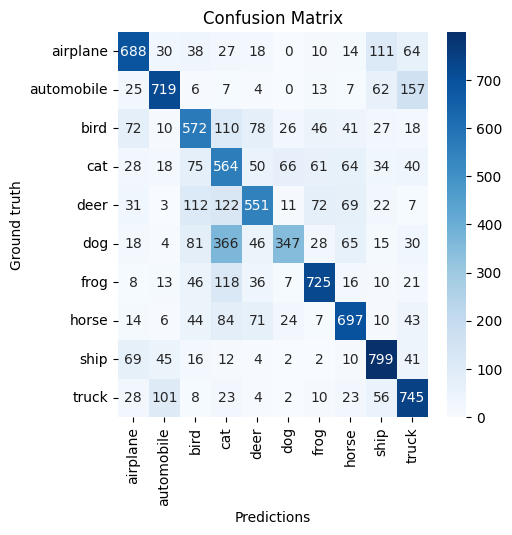

              precision    recall  f1-score   support

    airplane       0.70      0.69      0.69      1000
  automobile       0.76      0.72      0.74      1000
        bird       0.57      0.57      0.57      1000
         cat       0.39      0.56      0.46      1000
        deer       0.64      0.55      0.59      1000
         dog       0.72      0.35      0.47      1000
        frog       0.74      0.72      0.73      1000
       horse       0.69      0.70      0.69      1000
        ship       0.70      0.80      0.74      1000
       truck       0.64      0.74      0.69      1000

    accuracy                           0.64     10000
   macro avg       0.66      0.64      0.64     10000
weighted avg       0.66      0.64      0.64     10000

TOTAL: torch.Size([10000])


{'airplane': 93.95,
 'automobile': 94.89,
 'bird': 91.46,
 'cat': 86.95,
 'deer': 92.4,
 'dog': 92.09,
 'frog': 94.76,
 'horse': 93.88,
 'ship': 94.52000000000001,
 'truck': 93.24}

In [18]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

# Accuracy for `cat`, `dog`

import seaborn as sns

conf_matrix = confusion_matrix(y, y_hat)
class_names = test_set.classes

plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predictions')
plt.ylabel('Ground truth')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y, y_hat, target_names=class_names))
print(f"TOTAL: {y.shape}")
# list(zip(conf_matrix.diagonal()/conf_matrix.sum(axis=1), class_names)), conf_matrix.sum(axis=0)
# cm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
# list(zip(cm.diagonal(), class_names))

# accuracy  = (tp + tn) / (tp + tn + fp + fn)
{name: accuracy_score(np.array(y) == i, np.array(y_hat) == i) * 100 for i, name in enumerate(class_names)}
